In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('input.csv',header=None,names=['x1','middle','y2'])
middle = data['middle'].str.split(' ',expand=True)
data['y1'] = middle[0].astype(int)
data['x2'] = middle[2].astype(int)
data.drop(columns='middle',inplace=True)
data = data[['x1','y1','x2','y2']]

In [12]:
%%timeit

#Part One

non_diag = data[(data['x1'] == data['x2']) | (data['y1'] == data['y2'])]
zeros = np.zeros([1000,1000])

diagram_df = pd.DataFrame(data=zeros)

for i in non_diag.index:
    diagram_df.loc[min(non_diag.loc[i,'x1'],non_diag.loc[i,'x2']):max(non_diag.loc[i,'x1'],non_diag.loc[i,'x2']),
                   min(non_diag.loc[i,'y1'],non_diag.loc[i,'y2']):max(non_diag.loc[i,'y1'],non_diag.loc[i,'y2'])] += 1

(diagram_df > 1).sum().sum()

192 ms ± 84.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [13]:
%%timeit

#Part One - Version 2

non_diag = data[(data['x1'] == data['x2']) | (data['y1'] == data['y2'])]
counts = {}

for i in non_diag.index:

    line = non_diag.loc[i]
    x_dir = line.x2-line.x1
    y_dir = line.y2-line.y1

    if x_dir == 0:
        ys = np.arange(line.y1,line.y2+int(y_dir/abs(y_dir)),int(y_dir/abs(y_dir)))
        xs = np.array([line.x1]*len(ys))
    else:
        xs = np.arange(line.x1,line.x2+int(x_dir/abs(x_dir)),int(x_dir/abs(x_dir)))
        ys = np.array([line.y1]*len(xs))
    
    for pair in zip(xs,ys):
        if pair in counts.keys():
            counts[pair] += 1
        else:
            counts[pair] = 1

sum([i > 1 for i in counts.values()])

133 ms ± 10 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


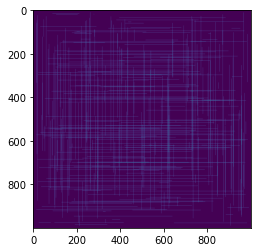

In [4]:
#Part One Visualization

plt.imshow(diagram_df.values)

In [11]:
%%timeit

# Part Two

diag = data[(data['x1'] != data['x2']) & (data['y1'] != data['y2'])]

for i in diag.index:
    x = diag.loc[i,'x1']
    y = diag.loc[i,'y1']
    end_x = diag.loc[i,'x2']
    end_y = diag.loc[i,'y2']
    while x != diag.loc[i,'x2']:
        diagram_df.loc[x,y] += 1
        if end_x > x:
            x += 1
        else:
            x -= 1
        if end_y > y:
            y += 1
        else:
            y -= 1
    diagram_df.loc[end_x,end_y] += 1

(diagram_df > 1).sum().sum()

10.7 s ± 2.05 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [8]:
%%timeit

#Part Two - Version 2

diag = data[(data['x1'] != data['x2']) & (data['y1'] != data['y2'])]

for i in diag.index:
    line = diag.loc[i]
    x_dir = int((line.x2-line.x1)/abs(line.x2-line.x1))
    y_dir = int((line.y2-line.y1)/abs(line.y2-line.y1))
    xs = np.arange(line.x1,line.x2+x_dir,x_dir)
    ys = np.arange(line.y1,line.y2+y_dir,y_dir)
    for pair in zip(xs,ys):
        if pair in counts.keys():
            counts[pair] += 1
        else:
            counts[pair] = 1

sum([i > 1 for i in counts.values()])

147 ms ± 44 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


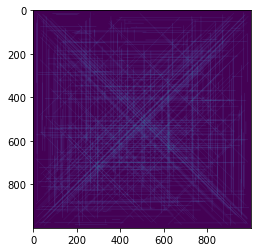

In [7]:
#Part Two Visualization

plt.imshow(diagram_df.values)